In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
from pandas import get_dummies

In [50]:
data = pd.read_csv("A0201.csv", sep=",")
data.head()

,sequence,length,meas,netmhc,netmhcpan,smmpmbec_cpp
0,AAAFVNQHL,9,5011.872336,10889.300933,16069.412530,6576.578374
1,AAAQGQAPL,9,19998.618696,5701.642723,12852.866599,3006.076303
2,AADSFATSY,9,19998.618696,28575.905434,24831.331053,92257.142715
3,AALGLWLSV,9,2999.162519,376.703799,187.068214,406.443329
4,AALQGGGPP,9,65012.969034,30902.954325,41304.750199,495450.190805


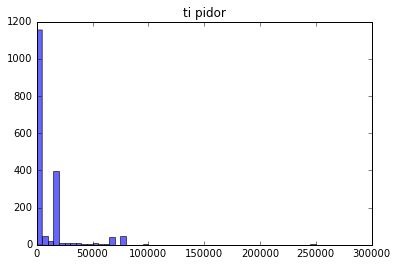

In [66]:
indexes = data['sequence'][data['length'] == 9].index
#indexes = data.index
selected_X = data['sequence'][indexes]
selected_y = pd.DataFrame(data['meas'][indexes])
selected_y['netmhc'] = pd.DataFrame(data['netmhc'][indexes])
selected_y['netmhcpan'] = pd.DataFrame(data['netmhcpan'][indexes])
selected_y['smmpmbec_cpp'] = pd.DataFrame(data['smmpmbec_cpp'][indexes])

letters_X = selected_X.apply(list)

selected_X = pd.get_dummies(pd.DataFrame(list(letters_X)))

#plt.figure(figsize = (16, 9))
plt.title("ti pidor")
hh = plt.hist(selected_y['meas'], 50, color = 'blue', alpha = 0.6)

In [8]:
from sklearn.cross_validation import train_test_split

In [52]:
random_number = 53
X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_y,
                                                    test_size = 0.33, random_state = random_number)

test_index = y_test.index
rss_netmhc = sum((y_test['netmhc'] - y_test['meas'])**2)
rss_netmhcpan = sum((y_test['netmhcpan'] - y_test['meas'])**2)
rss_smmpmbec_cpp = sum((y_test['smmpmbec_cpp'] - y_test['meas'])**2)

In [ ]:
Ridge

In [10]:
from sklearn.svm import SVR
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [49]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [12]:
svr.fit(selected_X, selected_y["meas"])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [13]:
TunedSVR = SVR(kernel='rbf', C=1000, gamma=0.10000000000000001)

In [14]:
svr.best_params_

{'C': 1000.0, 'gamma': 0.10000000000000001}

In [15]:
TunedSVR.fit(X_train, y_train["meas"])

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
t_rss = sum((TunedSVR.predict(X_test) - y_test['meas'])**2)
rss_netmhc = sum((y_test['netmhc'] - y_test['meas'])**2)
rss_netmhcpan = sum((y_test['netmhcpan'] - y_test['meas'])**2)
rss_smmpmbec_cpp = sum((y_test['smmpmbec_cpp'] - y_test['meas'])**2)
print("SVR MSE:", t_rss)
print("netmhc result", rss_netmhc)
print("netmhcpan result", rss_netmhcpan)
print("smmpmbec_cpp result", rss_smmpmbec_cpp)

SVR MSE: 147948259229.0
netmhc result 96455132412.2
netmhcpan result 95603031774.2
smmpmbec_cpp result 6.51984068046e+14


In [ ]:
import biopython

In [ ]:
from __future__ import print_function

import sys
from Bio.SeqUtils import ProtParamData  # Local
from Bio.SeqUtils import IsoelectricPoint  # Local
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.Data import IUPACData
from Bio.SeqUtils import molecular_weight

In [27]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam

data
seq = "QRSDSSLV"
X = ProtParam.ProteinAnalysis(seq)

print(X.molecular_weight())
print(X.aromaticity())
print(X.instability_index()) 
print(X.flexibility())
print(X.isoelectric_point()) 
print(X.secondary_structure_fraction())

890.9380999999998
0.0
111.82500000000002
[]
5.83636474609375
(0.25, 0.375, 0.125)


In [57]:
mol_weight = []
for i in data["sequence"]:
    X = ProtParam.ProteinAnalysis(i)
    mol_weight.append(X.molecular_weight())
data["molecular_weight"] = mol_weight

In [58]:
aromaticity = []
for i in data["sequence"]:
    X = ProtParam.ProteinAnalysis(i)
    aromaticity.append(X.aromaticity())
data["aromaticity"] = aromaticity

In [59]:
instability_index = []
for i in data["sequence"]:
    X = ProtParam.ProteinAnalysis(i)
    instability_index.append(X.instability_index())
data["instability_index"] = instability_index

In [60]:
isoelectric_point = []
for i in data["sequence"]:
    X = ProtParam.ProteinAnalysis(i)
    isoelectric_point.append(X.isoelectric_point())
data["isoelectric_point"] = isoelectric_point

In [61]:
target = data["meas"]

In [62]:
other_targets = data[["netmhc", "netmhcpan", "smmpmbec_cpp"]]

In [46]:
data.drop(["netmhc", "netmhcpan", "smmpmbec_cpp"], inplace=True,axis=1)

In [63]:
data.to_csv("ExtraData.csv")

In [64]:
data

,sequence,length,meas,netmhc,netmhcpan,smmpmbec_cpp,molecular_weight,aromaticity,instability_index,isoelectric_point
0,AAAFVNQHL,9,5011.872336,10889.300933,16069.412530,6576.578374,970.0825,0.111111,0.511111,6.786072
1,AAAQGQAPL,9,19998.618696,5701.642723,12852.866599,3006.076303,825.9094,0.000000,30.288889,5.570007
2,AADSFATSY,9,19998.618696,28575.905434,24831.331053,92257.142715,931.9419,0.222222,20.855556,3.799866
3,AALGLWLSV,9,2999.162519,376.703799,187.068214,406.443329,929.1134,0.111111,48.911111,5.570007
4,AALQGGGPP,9,65012.969034,30902.954325,41304.750199,495450.190805,766.8422,0.000000,93.933333,5.570007
5,AARAALQGG,9,69502.431759,31915.378551,40086.671763,398107.170553,813.9020,0.000000,58.822222,9.794983
6,AARHKHQVM,9,19998.618696,30760.968147,40271.703433,538269.782516,1077.2639,0.000000,48.222222,11.001038
7,AAVKAGAAL,9,50582.466200,16788.040181,13396.766874,14621.771745,770.9170,0.000000,-3.744444,8.794983
8,AAYARAAAL,9,1640.589773,4375.221052,3564.511334,2710.191632,876.9992,0.111111,35.200000,8.792542
9,ADVRALGGL,9,69502.431759,28379.190284,35892.193465,65917.389524,870.9930,0.000000,13.166667,5.881165
